In [1]:
import sys
sys.version
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
# load the famous iris data
irisRaw = load_iris()

In [3]:
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

In [4]:
# 1. Proszę wyświetlić dane i zapoznać się z posczególnymi informacjami.
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
# 2. Wyświetl liczbę wierszy oraz kolumn.
iris.shape
# 150 wierszy 5 kolumn

(150, 5)

In [6]:
# 3. Wyświetl podstawowe informacje dla poszczególnych kolumn. Skorzystaj z metod describe.
iris.describe(percentiles=[0.1,0.5,0.9])
# pokazuje ilość, średnią, odchylenie standardowe, i zadane wartości - min, max i dane pomiędzy 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
10%,4.800000,2.500000,1.400000,0.200000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
90%,6.900000,3.610000,5.800000,2.200000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
# 4. Zapoznaj się z działaniem metody groupby.
# funkcja służy do grupowania - 
a = lambda x: 0 if x<50 else 1
iris_groupby = iris.groupby(a, axis=0)
# można grupować za pomocą funkcji - argument to indeks
iris_groupby.describe()
iris_groupby = iris.groupby(["sepal length (cm)", "sepal width (cm)"], as_index=False)
# as_indeks - zapisuje zadane labele jako indeksy w wyniku
iris_groupby.describe()
iris_groupby = iris.groupby(["sepal length (cm)", "sepal width (cm)"], as_index=True)
iris_groupby.describe()
iris_groupby = iris.groupby(["sepal length (cm)", "sepal width (cm)"], sort=False)
# sort - sortuje wynik rosnąco
iris_groupby = iris.groupby(["sepal length (cm)", "sepal width (cm)"], group_keys=False)
# groups_keys - nie do końca rozumiem co robi
iris_groupby = iris.groupby(["sepal length (cm)", "sepal width (cm)"], observed=True, dropna=True)
# observed - ukrywa część wartości - nieobserwowalnych?
# dropna - pomija Nan-y w indeksach
iris_groupby.describe()

petal length (cm)                          \
                                               count mean std  min  25%  50%   
sepal length (cm) sepal width (cm)                                             
4.3               3.0                            1.0  1.1 NaN  1.1  1.1  1.1   
4.4               2.9                            1.0  1.4 NaN  1.4  1.4  1.4   
                  3.0                            1.0  1.3 NaN  1.3  1.3  1.3   
                  3.2                            1.0  1.3 NaN  1.3  1.3  1.3   
4.5               2.3                            1.0  1.3 NaN  1.3  1.3  1.3   
...                                              ...  ...  ..  ...  ...  ...   
7.7               2.6                            1.0  6.9 NaN  6.9  6.9  6.9   
                  2.8                            1.0  6.7 NaN  6.7  6.7  6.7   
                  3.0                            1.0  6.1 NaN  6.1  6.1  6.1   
                  3.8                            1.0  6.7 NaN  6.7  6.7  6.7   
7.9               3.8                            1.0  6.4 NaN  6.4  6.4  6.4   

                                             petal width (cm)       ...       \
                                    75%  max            count mean  ...  75%   
sepal length (cm) sepal width (cm)                                  ...        
4.3               3.0               1.1  1.1              1.0  0.1  ...  0.1   
4.4               2.9               1.4  1.4              1.0  0.2  ...  0.2   
                  3.0               1.3  1.3              1.0  0.2  ...  0.2   
                  3.2               1.3  1.3              1.0  0.2  ...  0.2   
4.5               2.3               1.3  1.3              1.0  0.3  ...  0.3   
...                                 ...  ...              ...  ...  ...  ...   
7.7               2.6               6.9  6.9              1.0  2.3  ...  2.3   
                  2.8               6.7  6.7              1.0  2.0  ...  2.0   
                  3.0               6.1  6.1              1.0  2.3  ...  2.3   
                  3.8               6.7  6.7              1.0  2.2  ...  2.2   
7.9               3.8               6.4  6.4              1.0  2.0  ...  2.0   

                                        target                               \
                                    max  count mean std  min  25%  50%  75%   
sepal length (cm) sepal width (cm)                                            
4.3               3.0               0.1    1.0  0.0 NaN  0.0  0.0  0.0  0.0   
4.4               2.9               0.2    1.0  0.0 NaN  0.0  0.0  0.0  0.0   
                  3.0               0.2    1.0  0.0 NaN  0.0  0.0  0.0  0.0   
                  3.2               0.2    1.0  0.0 NaN  0.0  0.0  0.0  0.0   
4.5               2.3               0.3    1.0  0.0 NaN  0.0  0.0  0.0  0.0   
...                                 ...    ...  ...  ..  ...  ...  ...  ...   
7.7               2.6               2.3    1.0  2.0 NaN  2.0  2.0  2.0  2.0   
                  2.8               2.0    1.0  2.0 NaN  2.0  2.0  2.0  2.0   
                  3.0               2.3    1.0  2.0 NaN  2.0  2.0  2.0  2.0   
                  3.8               2.2    1.0  2.0 NaN  2.0  2.0  2.0  2.0   
7.9               3.8               2.0    1.0  2.0 NaN  2.0  2.0  2.0  2.0   

                                         
                                    max  
sepal length (cm) sepal width (cm)       
4.3               3.0               0.0  
4.4               2.9               0.0  
                  3.0               0.0  
                  3.2               0.0  
4.5               2.3               0.0  
...                                 ...  
7.7               2.6               2.0  
                  2.8               2.0  
                  3.0               2.0  
                  3.8               2.0  
7.9               3.8               2.0  

[117 rows x 24 columns]

In [9]:
# 5. Wykorzystując metodę head proszę wyświelić 5 pierwszych wierszy
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [37]:
# 6. Korzystając z dropna sprawdź, czy baza zawiera brakujące dane
iris.dropna(how="any").shape != iris.shape
# nie zawiera niepotrzebnych danych

'sepal width (cm)'

In [38]:
# 7. Korzystając z metody sort_values posortuj dane rosnąco względem drugiej kolumny.
iris.sort_values(by=iris.columns[1],
                 axis="index",
                 ascending=True,
                 inplace=True,
                 kind="stable",
                 ignore_index=True,
                )
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,2.0,3.5,1.0,1.0
1,6.0,2.2,4.0,1.0,1.0
2,6.2,2.2,4.5,1.5,1.0
3,6.0,2.2,5.0,1.5,2.0
4,4.5,2.3,1.3,0.3,0.0
5,5.5,2.3,4.0,1.3,1.0
6,6.3,2.3,4.4,1.3,1.0
7,5.0,2.3,3.3,1.0,1.0
8,4.9,2.4,3.3,1.0,1.0
9,5.5,2.4,3.8,1.1,1.0


In [67]:
# 8. Wyznacz minimalną i maksymalną długość płatka (kolumna 3 - petal length). Podaj indeks tych wartości (min, idxmin).
petal_len = iris[iris.columns[2]]
max_ind = petal_len.idxmax()
min_ind = petal_len.idxmin()
min_val = petal_len.iloc[min_ind]
max_val = petal_len.iloc[max_ind]

print('max_ind = ',  max_ind)
print('min_ind = ',  min_ind)
print('max_val = ',  max_val)
print('min_val = ',  min_val)
# zgadza się z describe

max_ind =  22
min_ind =  132
max_val =  6.9
min_val =  1.0


In [68]:
# 9. Oblicz odchylenie standardowe dla każdej kolumny (std)
iris.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

In [93]:
# 1. 0Wyodrębnij wiersze dla których długość kielicha kwiatów (sepal length) jest większa od średniej długości (cały zbiór)
sepal_mean = iris["sepal length (cm)"].mean()
print(sepal_mean)
iris[iris["sepal length (cm)"]>sepal_mean]

5.843333333333334


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
1,6.0,2.2,4.0,1.0,1.0
2,6.2,2.2,4.5,1.5,1.0
3,6.0,2.2,5.0,1.5,2.0
6,6.3,2.3,4.4,1.3,1.0
12,6.3,2.5,4.9,1.5,1.0
...,...,...,...,...,...
123,6.3,3.4,5.6,2.4,2.0
124,6.2,3.4,5.4,2.3,2.0
134,7.2,3.6,6.1,2.5,2.0
142,7.7,3.8,6.7,2.2,2.0


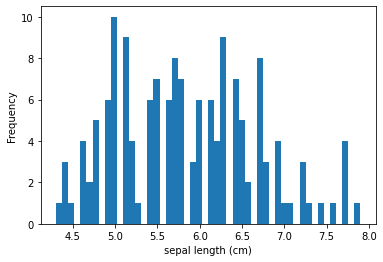

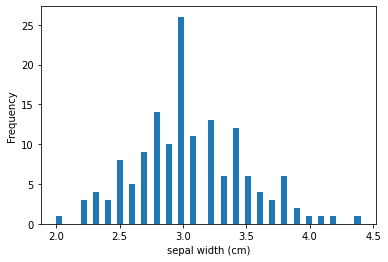

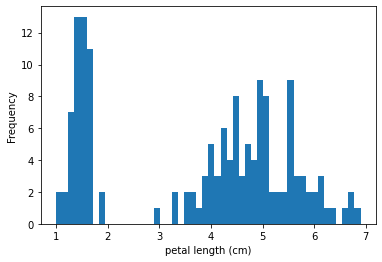

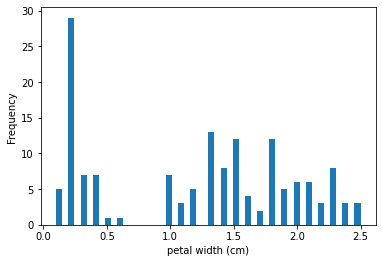

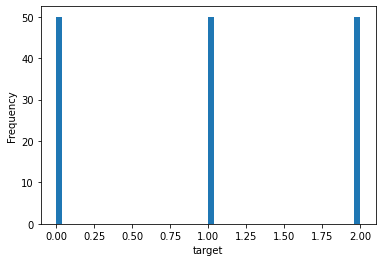

In [92]:
# 1. 1Wyświetl histogramy dla poszczególnych parametrów z uwzglednieniem przynależności do danej klasy.
for col_name in iris.columns:
    col = iris[col_name]
    col.plot.hist(bins=50)
    plt.xlabel(col_name)
    plt.show()
    
